<a href="https://colab.research.google.com/github/kamalupadhaya/machine_learning/blob/main/Copy_of_mlpp23_assignment_06_upadhaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLPP23 // Assignment #6**

assigned : **Apr 26, 2023**

DUE : **May 8, 2023 11:59pm**

## NYC Stop and Frisk: predictors of outcomes

<img src="https://i1.wp.com/www.nationalreview.com/wp-content/uploads/2018/01/new-york-city-stop-and-frisk-crime-decline-conservatives-wrong-1.jpg?fit=789%2C460&ssl=1" width=500x>

---

NYC's *Stop, Question, and Frisk* is a program/practice by the New York Police Department in which officers approach, temporarily detain, and (in some cases) frisk civilians on the street for weapons or contraband.  The program's implementation has been highly controversial with accusations of racial profiling and bias, and in 2013 a US federal judge found that the program had been carried out in a way that violated the US Constitution.  Using publicly available Stop and Frisk [data](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page), in this assignment you will expore the ability of Random Forest models to predict whether, for those stops in which a suspect was suspected of having a weapon, a weapon is likely to have been found (an analysis related to the one carried out in [Goel, Rao, & Shroff, 2016](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-10/issue-1/Precinct-or-prejudice-Understanding-racial-disparities-in-New-York-Citys/10.1214/15-AOAS897.full)).

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None


---

### **Part 1 - Loading and Cleaning data**

**Read in the 2010 stop and frisk data from  `mlpp23/data/stop_and_frisk/` into a DataFrame called `sqf` setting `low_memory=False` in `pd.read_csv`.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#--useful imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#--read in the data
fpath = '/content/drive/MyDrive/MLPP23/Assignments/stop_and_frisk/Copy of 2010.csv'
sqf = pd.read_csv(fpath, low_memory=False)
sqf

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2010,78,81,1012010,340,1,O,P,1,MISD,...,,78,,,,995504,189189,CM,1,20
1,2010,26,21,1042010,1548,1,O,P,2,ROBBERY,...,,26,F,,,998641,236979,CM,1,85
2,2010,18,34,1092010,1550,1,I,T,1,MISD,...,,18,H,,,,,CM,1,20
3,2010,108,102,1112010,1120,A,O,P,5,BURGLARY,...,,108,G,,,1009146,209683,CM,1,14
4,2010,23,2437,1222010,1620,1,O,H,1,CPM,...,,23,,,,,,CM,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601280,2010,108,6765,12312010,2350,1,O,P,1,GLA,...,,108,J,,,1011674,211064,CM,1,46
601281,2010,101,10086,12312010,2351,A,O,P,1,FEL,...,,101,C,,,1050143,160385,CM,1,20
601282,2010,101,10087,12312010,2351,A,O,P,1,FEL,...,,101,C,,,1050143,160385,CM,1,20
601283,2010,120,18517,12312010,2353,A,O,P,1,GLA,...,,120,H,,,958480,174454,CM,1,46


**Looking at the "Data Dictionary" in the link above (i.e., the SQF file documentation found** [here](https://www1.nyc.gov/assets/nypd/downloads/zip/analysis_and_planning/stop-question-frisk/SQF-File-Documentation.zip)**) drop all columns except:**

<b>

1. the period of observation
2. whether the stop was made inside or outside
3. columns that indicate that a weapon was found on the subject
4. columns related to whether the subject was suspected of carrying a weapon
5. the subject's sex
6. the subject's age
7. the subject's race

</b>

In [ ]:
#--sub-select columns
sqf = sqf[['perobs', 'inout', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'rf_othsw', 'cs_bulge', 'sb_outln', 'rf_bulg','sex', 'age', 'race']]
sqf

,perobs,inout,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,rf_othsw,cs_bulge,sb_outln,rf_bulg,sex,age,race
0,1,O,N,N,N,N,N,N,N,N,N,N,M,17,B
1,2,O,N,N,N,N,N,N,N,N,N,N,M,20,P
2,1,I,N,N,N,N,N,N,Y,N,N,N,M,55,Q
3,5,O,N,N,N,N,N,N,N,N,N,N,M,17,Q
4,1,O,N,N,N,N,N,N,N,N,N,N,M,55,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601280,1,O,N,N,N,N,N,N,N,N,N,N,M,19,Q
601281,1,O,N,N,N,N,N,N,N,N,N,N,M,20,B
601282,1,O,N,N,N,N,N,N,N,N,N,N,M,31,B
601283,1,O,N,N,N,N,N,N,N,N,N,N,F,23,B


**Convert all binary columns (i.e., columns with categories that only have two possible values) to 1s and 0s.**

In [ ]:
#--replaceing 'Y' with 1 and 'N' with 0 in binary columns
for col in sqf:
  if col == 'inout':
    sqf[col] = sqf[col].replace({'I':1, 'O': 0})

  else:
    sqf[col] = sqf[col].replace({'Y':1, 'N':0})

sqf

<ipython-input-5-8358f4f1cf8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqf[col] = sqf[col].replace({'Y':1, 'N':0})
<ipython-input-5-8358f4f1cf8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqf[col] = sqf[col].replace({'I':1, 'O': 0})


,perobs,inout,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,rf_othsw,cs_bulge,sb_outln,rf_bulg,sex,age,race
0,1,0,0,0,0,0,0,0,0,0,0,0,M,17,B
1,2,0,0,0,0,0,0,0,0,0,0,0,M,20,P
2,1,1,0,0,0,0,0,0,1,0,0,0,M,55,Q
3,5,0,0,0,0,0,0,0,0,0,0,0,M,17,Q
4,1,0,0,0,0,0,0,0,0,0,0,0,M,55,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601280,1,0,0,0,0,0,0,0,0,0,0,0,M,19,Q
601281,1,0,0,0,0,0,0,0,0,0,0,0,M,20,B
601282,1,0,0,0,0,0,0,0,0,0,0,0,M,31,B
601283,1,0,0,0,0,0,0,0,0,0,0,0,F,23,B


**Only keep rows that indicate that a suspect might have been suspected of carrying a weapon.**

In [ ]:
#--keep data set where suspect might have been suspected i.e. keep rows for suspect with vlaues of 1 

sqf = sqf[sqf[['rf_othsw', 'cs_bulge', 'sb_outln', 'rf_bulg']].isin([1]).any(axis = 1)]

sqf

,perobs,inout,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,rf_othsw,cs_bulge,sb_outln,rf_bulg,sex,age,race
2,1,1,0,0,0,0,0,0,1,0,0,0,M,55,Q
6,1,0,0,0,0,0,0,0,0,1,0,1,M,18,B
15,1,1,0,0,0,0,0,0,0,0,0,1,M,19,Z
21,2,0,1,0,0,0,0,0,0,1,0,1,M,15,B
22,1,1,0,0,0,0,0,0,0,1,0,1,M,16,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601239,1,0,0,0,0,0,0,0,0,1,0,1,M,28,B
601251,1,0,0,0,0,0,0,0,0,1,0,1,M,18,B
601253,1,0,0,0,0,0,0,0,0,1,0,0,M,22,B
601255,1,0,0,0,0,0,0,0,0,1,0,1,M,24,Q


**Create a column `"weapon_fnd"` to indicate whether a weapon (of any type) was found or not (1 or 0).**

In [ ]:
#--creating a cloumn 'weapon_fnd' if any of the weapon has a value of 1 then it will be 1 else 0
sqf['weapon_fnd'] = ((sqf[['pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap']] == 1).any(axis = 1)).astype(int)

sqf

<ipython-input-7-f2ac40057416>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqf['weapon_fnd'] = ((sqf[['pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap']] == 1).any(axis = 1)).astype(int)


,perobs,inout,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,rf_othsw,cs_bulge,sb_outln,rf_bulg,sex,age,race,weapon_fnd
2,1,1,0,0,0,0,0,0,1,0,0,0,M,55,Q,0
6,1,0,0,0,0,0,0,0,0,1,0,1,M,18,B,0
15,1,1,0,0,0,0,0,0,0,0,0,1,M,19,Z,0
21,2,0,1,0,0,0,0,0,0,1,0,1,M,15,B,1
22,1,1,0,0,0,0,0,0,0,1,0,1,M,16,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601239,1,0,0,0,0,0,0,0,0,1,0,1,M,28,B,0
601251,1,0,0,0,0,0,0,0,0,1,0,1,M,18,B,0
601253,1,0,0,0,0,0,0,0,0,1,0,0,M,22,B,0
601255,1,0,0,0,0,0,0,0,0,1,0,1,M,24,Q,0


**How many times was a weapon found on the suspect?  How many times was a weapon not found on the suspect?**

In [ ]:
#--counting the weapon_fnd column 
weapon_found = sqf['weapon_fnd'].value_counts()

print('weapon found: ', weapon_found[1])
print('weapon not found: ', weapon_found[0])

weapon found:  4783
weapon not found:  80122


**In the next part, `"weapon_fnd"` will be your target variable, and note from your answer above that the data set is not balanced.  Create a balanced data set.**

In [ ]:
# separate the DataFrame into two classes based on the weapon_fnd column
class_0 = sqf[sqf['weapon_fnd'] == 0]
class_1 = sqf[sqf['weapon_fnd'] == 1]

# get the size of the smaller class
n = min(len(class_0), len(class_1))

# sample n rows from each class
class_0_sample = class_0.sample(n=n, random_state=42)
class_1_sample = class_1.sample(n=n, random_state=42)

# concatenate the sampled classes into a balanced dataset
balanced_data = pd.concat([class_0_sample, class_1_sample])

balanced_data

,perobs,inout,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,rf_othsw,cs_bulge,sb_outln,rf_bulg,sex,age,race,weapon_fnd
575816,1,1,0,0,0,0,0,0,1,0,0,0,M,17,B,0
77779,1,0,0,0,0,0,0,0,0,1,0,0,M,64,W,0
83710,1,1,0,0,0,0,0,0,0,1,0,1,F,35,B,0
541629,2,0,0,0,0,0,0,0,0,1,0,1,M,33,B,0
276278,1,1,0,0,0,0,0,0,1,0,0,0,M,29,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552292,3,0,0,0,0,1,0,0,1,0,0,0,M,51,B,1
66087,1,1,0,0,0,1,0,0,1,0,0,0,M,34,W,1
388922,5,0,0,0,0,1,0,0,1,0,0,0,M,46,B,1
465300,5,1,0,0,0,1,0,0,0,1,0,1,M,23,P,1


### **Part 3 - Fitting Tree-based Classifier Models**

The goal of this part of the assignment is to build a model that uses several features of the stops in which the subject was suspected of carrying a weapon to predict whether a weapon was actually found.

**Create your features from your balanced data set using the period of observation, whether the stop was inside or outside, the sex of the subject, the age of the subject, and the race of the subject as features (make sure to One Hot Encode categorical features).  Set the `"weapon_fnd"` column to be your target.**

In [ ]:
#--columns for features
features = balanced_data[['perobs', 'inout', 'sex', 'age', 'race']]

#--one-hot encode categorical features
features = pd.get_dummies(features, columns=['sex', 'race'])

#--set target variable
target = balanced_data['weapon_fnd']


**Split your features and target into a training and testing set using an 80/20 split, setting `random_state` to `302`.**

In [ ]:
#--split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=42)

**Fit a `RandomForestClassifier` to your data with default hyperparameters and comment on its accuracy.**

In [ ]:
#--create an instance of RandomForestClassifier

rfc = RandomForestClassifier()

#--fit data to the classifier
rfc.fit(X_train, y_train)

#--predict on testing data
y_pred = rfc.predict(X_test)

#--che3cking accuracy 
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of RandomForestClassifier with default hyperparameters: {accuracy:.4f}')

Accuracy of RandomForestClassifier with default hyperparameters: 0.5867


**Tune the `min_samples_leaf` hyperparameter using Grid Search with Cross Validation and comment on the resultant model accuracy.**

In [ ]:
# Define a grid of hyperparameters to search over
param_grid = {'min_samples_leaf': [1, 5, 10, 20, 50]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print('Best hyperparameters:', grid_search.best_params_)

# Evaluate the model accuracy on the testing set
print('Accuracy of best model:', grid_search.score(X_test, y_test))

Best hyperparameters: {'min_samples_leaf': 10}
Accuracy of best model: 0.625914315569488


### **Part 4 - Fitting Tree-based Regression Models**

In this part of the assignment, you'll be extending your modeling to include predictions of *probabilities* that a weapon was found given your features using tree-based regression models.

**Fit a Random Forest *Regressor* to the data (being sure to tune `min_samples_leaf` with Grid Search).**

In [ ]:
#--split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=42)

#--create a RandomForestRegressor object
rf = RandomForestClassifier(random_state=42)


#--define parameter grid to search over 
params = {'min_samples_leaf': [1, 2, 4, 8, 16, 32]}

#--create a grid search object to search parameter grid
grid = GridSearchCV(rf, params, cv=5, n_jobs=-1)

#--fit the grid search object to training data
grid.fit(X_train, y_train)

print('Best min_samples_leaf:', grid.best_params_['min_samples_leaf'])
print('Accuracy:', accuracy_score(y_test, y_pred))

print('Best Parametes: ', grid.best_params_)
print('Best Score: ', grid_search.best_score_)

Best min_samples_leaf: 16
Accuracy: 0.5867293625914316
Best Parametes:  {'min_samples_leaf': 16}
Best Score:  0.6295064527008278


**With this Random Forest Regressor, we can interpret the prediction of the model as the probability that a weapon would be found given the features.  Make a histogram (`range` of 0 to 1 and 30 bins) of the predictions of this model using the subset of the testing data for which the subject's race was white and another histogram using the subset of the testing data for which the subject's race was black.**

['Q' 'B' 'Z' 'W' 'A' 'U' 'P' 'I']


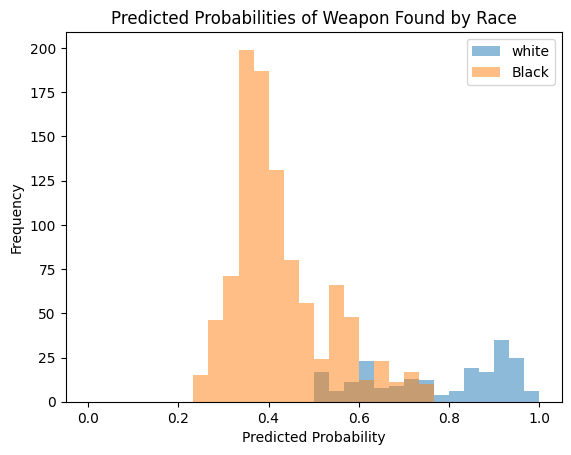

In [ ]:
print(sqf['race'].unique())

rf_reg = RandomForestRegressor(random_state=42)
param_grid = {'min_samples_leaf' : [1,5,10,20,50]}

#--grid search wiht cross-validation
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


#--fit hte model with best hyperparameters
best_rf_reg = grid_search.best_estimator_
best_rf_reg.fit(X_train, y_train)

#--predict probabilities for each subset
white_probs = best_rf_reg.predict(X_test[X_test['race_W'] == 1])
black_probs = best_rf_reg.predict(X_test[X_test['race_B'] == 1])

#--create histogram
plt.hist(white_probs, range=(0,1), bins=30, alpha = 0.5, label='white')
plt.hist(black_probs, range=(0,1), bins=30, alpha = 0.5, label ='Black')
plt.title('Predicted Probabilities of Weapon Found by Race')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


**Comment on the potential implications of this plot.**

This histogram tells us that even though the frequecny of black suspects for carrying the weapon is more, the probability of carrying the weapon is more for white suspects. 

**Repeat the above (fit a Random Forest Regressor and plot histograms of the predictions of the subsets of the test data for which the subject was white and black) but *removing the subject's race as a feature on which the model is fit*.**

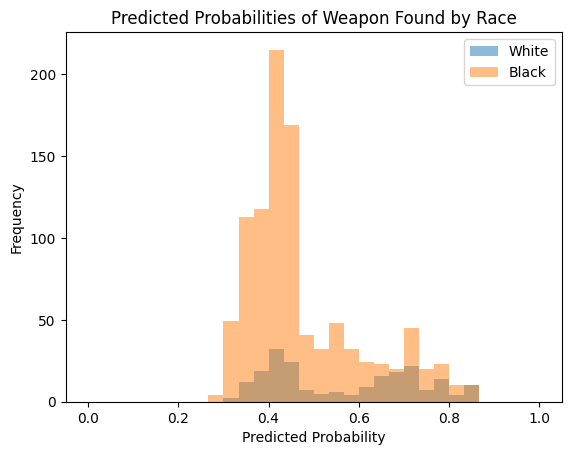

In [ ]:
#--dropping race_W and race _B features form X_train

X_train = X_train.drop(['race_W', 'race_B'], axis=1)

#--fit a RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
param_grid = {'min_samples_leaf':[1,5,10,20,50]}

#--Grid search with cross_validation
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#--fit the model with best hyperparamters
best_rf_reg = grid_search.best_estimator_
best_rf_reg.fit(X_train, y_train)

#--create subsets of the testing data for white and black subjects
white_data = X_test[X_test['race_W'] == 1].drop(['race_W', 'race_B'], axis=1)
black_data = X_test[X_test['race_B'] == 1].drop(['race_W', 'race_B'], axis=1)

# Predict probabilities for each subset
white_probs = best_rf_reg.predict(white_data)
black_probs = best_rf_reg.predict(black_data)

# Create histograms
plt.hist(white_probs, range=(0, 1), bins=30, alpha=0.5, label='White')
plt.hist(black_probs, range=(0, 1), bins=30, alpha=0.5, label='Black')
plt.title('Predicted Probabilities of Weapon Found by Race')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

**Comment on these histograms in comparison to the previous histograms in which the subjects race was used to predict the outcome.**

on removing subject's race as a figure, frequency of black suspect is more but the probability is pretty much similar for both the suspects.  

**Assuming that a probability over `0.5` indicates that the model predicts that a weapon will be found on the suspect, is the model that uses the race of a subject as a feature more or less accurate than the model that does not?**

Assuming probability over 0.5 indicated that a weapon will be found on the suspects, and based on the histograms of predicted probabilities for both white and black subjects, it appears that the model that utilizes race as a feature tends to predict a higher likelihood of a shite suspect having a weapon compared to a black suspect. For the better prediction, it would be better if we calcualte the performance metrics. 